In [150]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [151]:
df = pd.read_csv("/content/ENVISION-RAWDATASET-HEART-TEAM STACKERS.csv")


In [152]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,patient_id,unnecessary_feature
0,63.0,male,asymptomatic,145.0,233.0,True,normal,NaN,no,2.3,upsloping,0.0,normal,NaN,ID1,B
1,37.0,male,non-anginal pain,NaN,250.0,False,ST-T wave abnormality,187.0,no,3.5,upsloping,0.0,NaN,1.0,ID2,A
2,41.0,female,atypical angina,130.0,204.0,False,normal,172.0,no,1.4,downsloping,0.0,fixed defect,1.0,ID3,C
3,56.0,male,atypical angina,120.0,236.0,False,ST-T wave abnormality,178.0,no,0.8,downsloping,0.0,fixed defect,NaN,ID4,B
4,57.0,female,typical angina,120.0,354.0,False,ST-T wave abnormality,NaN,yes,0.6,downsloping,0.0,fixed defect,1.0,ID5,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,66.0,male,typical angina,120.0,352.0,False,normal,151.0,no,0.4,flat,0.0,fixed defect,NaN,ID52,B
896,62.0,male,non-anginal pain,130.0,231.0,False,ST-T wave abnormality,146.0,no,1.8,flat,3.0,reversible defect,1.0,ID53,B
897,44.0,female,non-anginal pain,108.0,191.0,False,ST-T wave abnormality,175.0,no,0.6,flat,NaN,fixed defect,1.0,ID54,C
898,63.0,NaN,NaN,202.5,302.0,False,normal,172.0,no,0.0,downsloping,NaN,fixed defect,1.0,ID55,C


In [153]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,patient_id,unnecessary_feature
0,63.0,male,asymptomatic,145.0,233.0,True,normal,NaN,no,2.3,upsloping,0.0,normal,NaN,ID1,B
1,37.0,male,non-anginal pain,NaN,250.0,False,ST-T wave abnormality,187.0,no,3.5,upsloping,0.0,NaN,1.0,ID2,A
2,41.0,female,atypical angina,130.0,204.0,False,normal,172.0,no,1.4,downsloping,0.0,fixed defect,1.0,ID3,C
3,56.0,male,atypical angina,120.0,236.0,False,ST-T wave abnormality,178.0,no,0.8,downsloping,0.0,fixed defect,NaN,ID4,B
4,57.0,female,typical angina,120.0,354.0,False,ST-T wave abnormality,NaN,yes,0.6,downsloping,0.0,fixed defect,1.0,ID5,B


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  807 non-null    float64
 1   sex                  815 non-null    object 
 2   cp                   812 non-null    object 
 3   trestbps             814 non-null    float64
 4   chol                 800 non-null    float64
 5   fbs                  813 non-null    object 
 6   restecg              813 non-null    object 
 7   thalach              819 non-null    float64
 8   exang                818 non-null    object 
 9   oldpeak              826 non-null    float64
 10  slope                817 non-null    object 
 11  ca                   802 non-null    float64
 12  thal                 813 non-null    object 
 13  target               797 non-null    float64
 14  patient_id           900 non-null    object 
 15  unnecessary_feature  900 non-null    obj

In [155]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca,target
count,807.000000,814.000000,800.000000,819.000000,826.000000,802.000000,797.000000
mean,54.408547,135.529750,249.639816,149.347500,1.122482,0.807993,0.483947
std,9.205814,24.226989,54.214137,23.072910,1.264650,1.059842,0.499920
min,27.621062,94.000000,119.908408,67.837755,0.000000,0.000000,0.000000
25%,48.000000,120.000000,212.000000,134.166391,0.000000,0.000000,0.000000
50%,55.089779,130.000000,243.811496,152.000000,0.800000,0.000000,0.000000
75%,61.000000,145.000000,280.335073,167.099683,1.810360,1.040607,1.000000
max,79.657479,225.000000,564.000000,202.000000,6.482180,4.197010,1.049315


In [156]:
df.isnull().sum()

,0
age,93
sex,85
cp,88
trestbps,86
chol,100
fbs,87
restecg,87
thalach,81
exang,82
oldpeak,74


In [157]:
 import pandas as pd

# Load the data
df = pd.read_csv('ENVISION-RAWDATASET-HEART-TEAM STACKERS.csv')

# Convert every single null value to 0
df = df.fillna(0)

print("Null values remaining:", df.isnull().sum().sum())

Null values remaining: 0


In [159]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,patient_id,unnecessary_feature
0,63.0,male,asymptomatic,145.0,233.0,True,normal,0.0,no,2.3,upsloping,0.0,normal,0.0,ID1,B
1,37.0,male,non-anginal pain,0.0,250.0,False,ST-T wave abnormality,187.0,no,3.5,upsloping,0.0,0,1.0,ID2,A
2,41.0,female,atypical angina,130.0,204.0,False,normal,172.0,no,1.4,downsloping,0.0,fixed defect,1.0,ID3,C
3,56.0,male,atypical angina,120.0,236.0,False,ST-T wave abnormality,178.0,no,0.8,downsloping,0.0,fixed defect,0.0,ID4,B
4,57.0,female,typical angina,120.0,354.0,False,ST-T wave abnormality,0.0,yes,0.6,downsloping,0.0,fixed defect,1.0,ID5,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,66.0,male,typical angina,120.0,352.0,False,normal,151.0,no,0.4,flat,0.0,fixed defect,0.0,ID52,B
896,62.0,male,non-anginal pain,130.0,231.0,False,ST-T wave abnormality,146.0,no,1.8,flat,3.0,reversible defect,1.0,ID53,B
897,44.0,female,non-anginal pain,108.0,191.0,False,ST-T wave abnormality,175.0,no,0.6,flat,0.0,fixed defect,1.0,ID54,C
898,63.0,0,0,202.5,302.0,False,normal,172.0,no,0.0,downsloping,0.0,fixed defect,1.0,ID55,C


In [178]:
df['unnecessary_feature'].value_counts()

,count
unnecessary_feature,
B,317
C,316
A,267


In [160]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

In [161]:
df['cp'] = df['cp'].map({'atypical angina': 0, 'asymptomatic':1,'typical angina':2,'non-anginal pain':3})

In [162]:
df['fbs'] = df['fbs'].map({'True': 1, 'False': 0})

In [163]:
df['restecg'] = df['restecg'].map({'ST-T wave abnormality': 1, 'normal': 0})

In [164]:
 df['exang'] = df['exang'].map({'yes': 1, 'no': 0})

In [165]:
df['slope'] = df['slope'].map({'upsloping': 1, 'flat': 0,'downsloping':2})

In [166]:
df['thal'] = df['thal'].map({'fixed defect': 0, 'reversible defect': 1})

In [167]:
df['target'] = df['target'].fillna(0)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  900 non-null    float64
 1   sex                  815 non-null    float64
 2   cp                   812 non-null    float64
 3   trestbps             900 non-null    float64
 4   chol                 900 non-null    float64
 5   fbs                  0 non-null      float64
 6   restecg              799 non-null    float64
 7   thalach              900 non-null    float64
 8   exang                818 non-null    float64
 9   oldpeak              900 non-null    float64
 10  slope                817 non-null    float64
 11  ca                   900 non-null    float64
 12  thal                 766 non-null    float64
 13  target               900 non-null    float64
 14  patient_id           900 non-null    object 
 15  unnecessary_feature  900 non-null    obj

In [169]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,patient_id,unnecessary_feature
0,63.0,1.0,1.0,145.0,233.0,NaN,0.0,0.0,0.0,2.3,1.0,0.0,NaN,0.0,ID1,B
1,37.0,1.0,3.0,0.0,250.0,NaN,1.0,187.0,0.0,3.5,1.0,0.0,NaN,1.0,ID2,A
2,41.0,0.0,0.0,130.0,204.0,NaN,0.0,172.0,0.0,1.4,2.0,0.0,0.0,1.0,ID3,C
3,56.0,1.0,0.0,120.0,236.0,NaN,1.0,178.0,0.0,0.8,2.0,0.0,0.0,0.0,ID4,B
4,57.0,0.0,2.0,120.0,354.0,NaN,1.0,0.0,1.0,0.6,2.0,0.0,0.0,1.0,ID5,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,66.0,1.0,2.0,120.0,352.0,NaN,0.0,151.0,0.0,0.4,0.0,0.0,0.0,0.0,ID52,B
896,62.0,1.0,3.0,130.0,231.0,NaN,1.0,146.0,0.0,1.8,0.0,3.0,1.0,1.0,ID53,B
897,44.0,0.0,3.0,108.0,191.0,NaN,1.0,175.0,0.0,0.6,0.0,0.0,0.0,1.0,ID54,C
898,63.0,NaN,NaN,202.5,302.0,NaN,0.0,172.0,0.0,0.0,2.0,0.0,0.0,1.0,ID55,C


In [170]:
df.describe(include="object")

,patient_id,unnecessary_feature
count,900,900
unique,303,3
top,ID216,B
freq,9,317


In [171]:
import pandas as pd
from google.colab import files

# 1. Load the data
df = pd.read_csv('ENVISION-RAWDATASET-HEART-TEAM STACKERS.csv')

# 2. Fill all Null values with 0
df = df.fillna(0)

# 3. Remove Outliers using IQR for main columns
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

# 4. Save and Download the file
df.to_csv('heartrisk-preproccesed data for envision.csv ', index=False)
files.download('heartrisk-preproccesed data for envision.csv ')
print("file downloaded successfully")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

file downloaded successfully


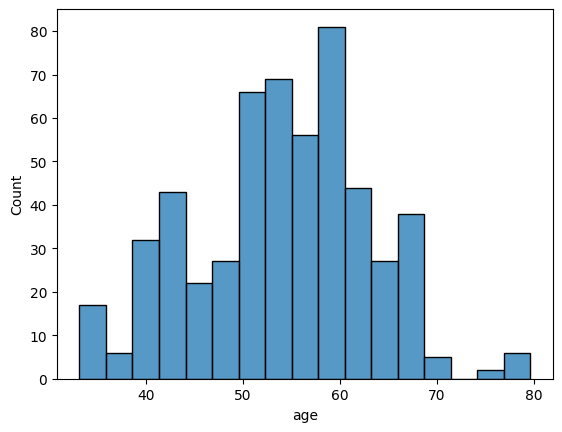

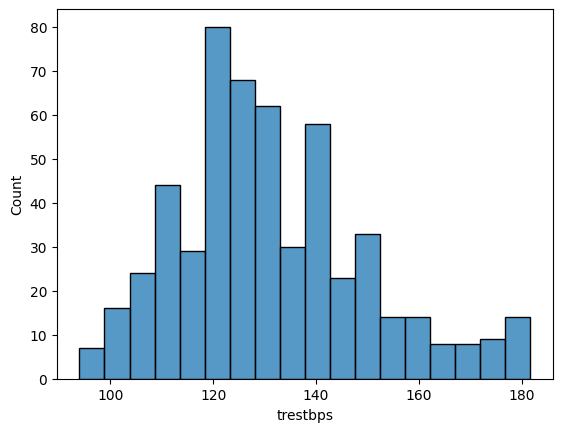

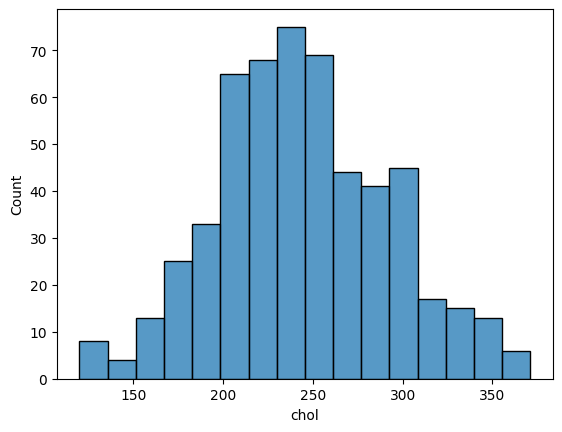

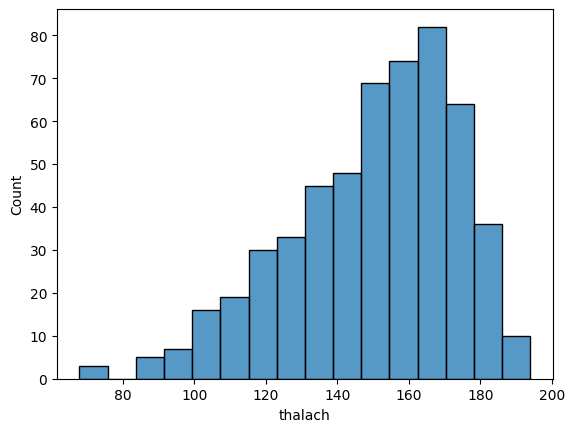

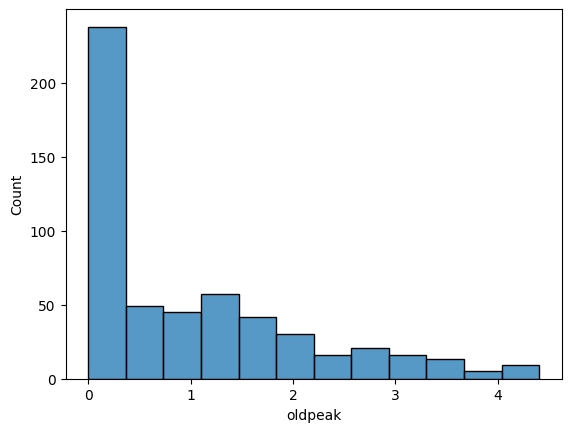

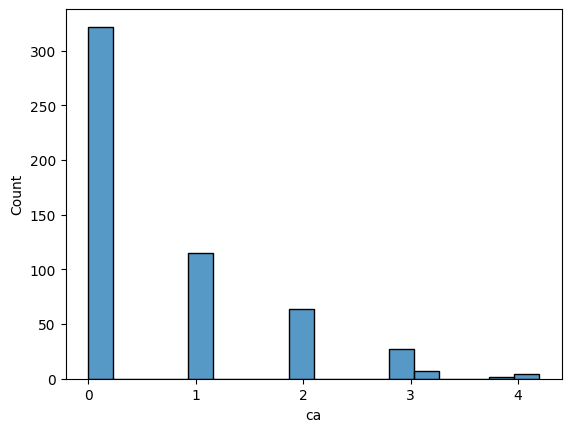

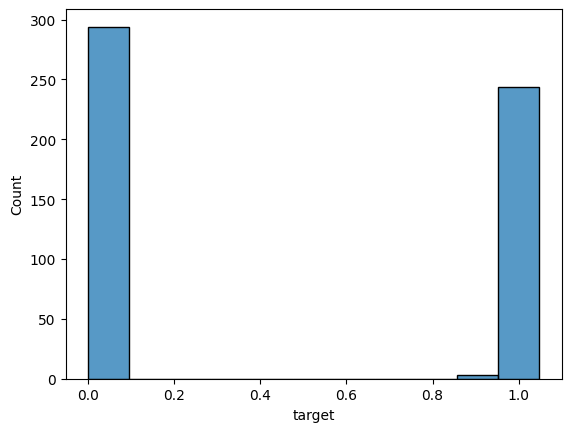

In [172]:
for i in df.select_dtypes(include="number").columns:
    # Use distplot if histplot is not available in your seaborn version
    # sns.hisplot(data=df, x=i)
    sns.histplot(df[i])  # Use distplot instead of hisplot
    plt.show()

/tmp/ipython-input-2280436288.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


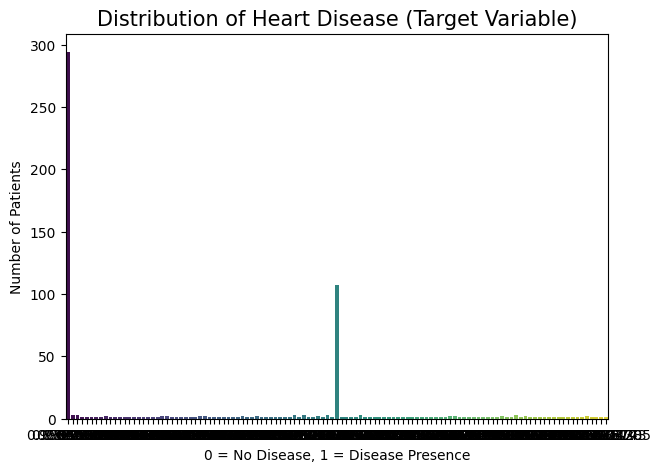

In [173]:
plt.figure(figsize=(7, 5))
# Use a countplot for the 'target' column
sns.countplot(x='target', data=df, palette='viridis')

plt.title('Distribution of Heart Disease (Target Variable)', fontsize=15)
plt.xlabel('0 = No Disease, 1 = Disease Presence')
plt.ylabel('Number of Patients')
plt.show()

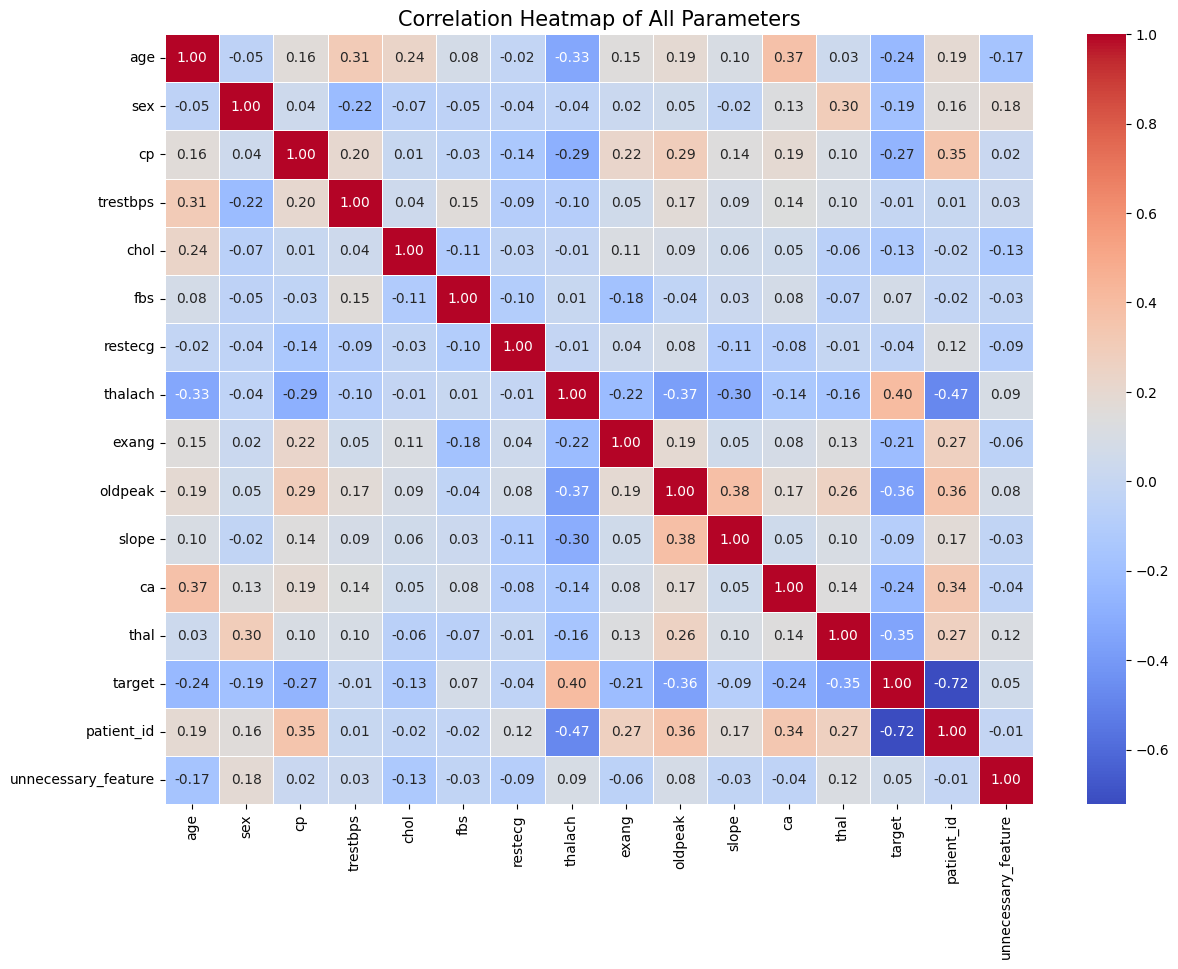

In [174]:
# We fill nulls with 0 and encode text just for this heatmap
df_temp = df.fillna(0)
for col in df_temp.select_dtypes(include=['object']).columns:
    df_temp[col] = pd.factorize(df_temp[col])[0]

plt.figure(figsize=(14, 10))
# Create the heatmap
correlation_matrix = df_temp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of All Parameters', fontsize=15)
plt.show()

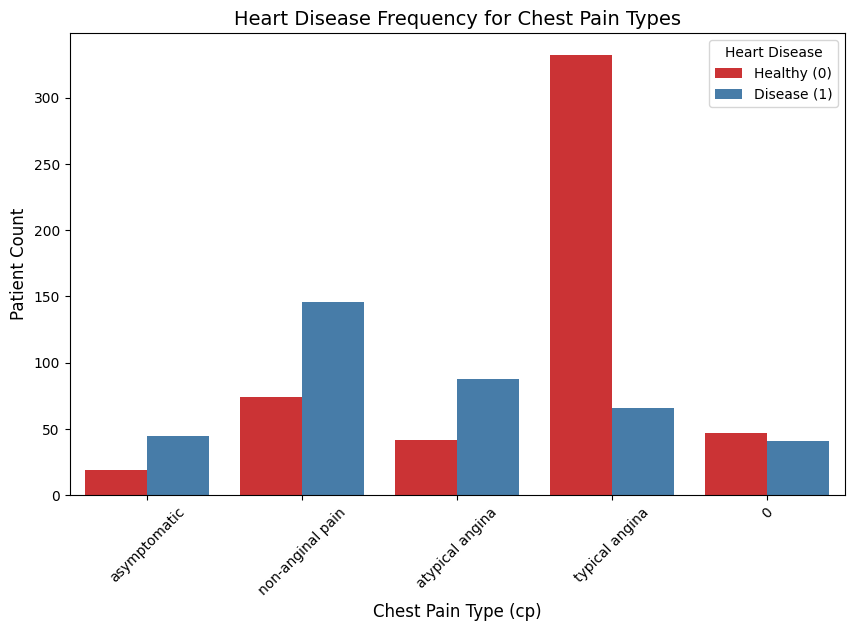

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load and clean
df = pd.read_csv('ENVISION-RAWDATASET-HEART-TEAM STACKERS.csv').fillna(0)
df['target'] = df['target'].round().astype(int)

# 2. Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cp', hue='target', palette='Set1')

plt.title('Heart Disease Frequency for Chest Pain Types', fontsize=14)
plt.xlabel('Chest Pain Type (cp)', fontsize=12)
plt.ylabel('Patient Count', fontsize=12)
plt.legend(title='Heart Disease', labels=['Healthy (0)', 'Disease (1)'])
plt.xticks(rotation=45)
plt.show()

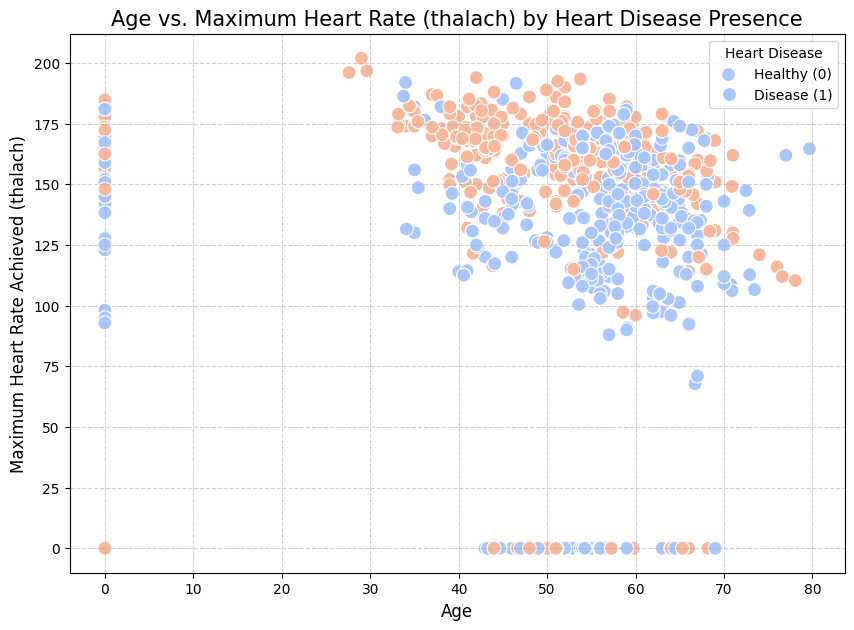

In [176]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette='coolwarm', s=100)
plt.title('Age vs. Maximum Heart Rate (thalach) by Heart Disease Presence', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Maximum Heart Rate Achieved (thalach)', fontsize=12)
plt.legend(title='Heart Disease', labels=['Healthy (0)', 'Disease (1)'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

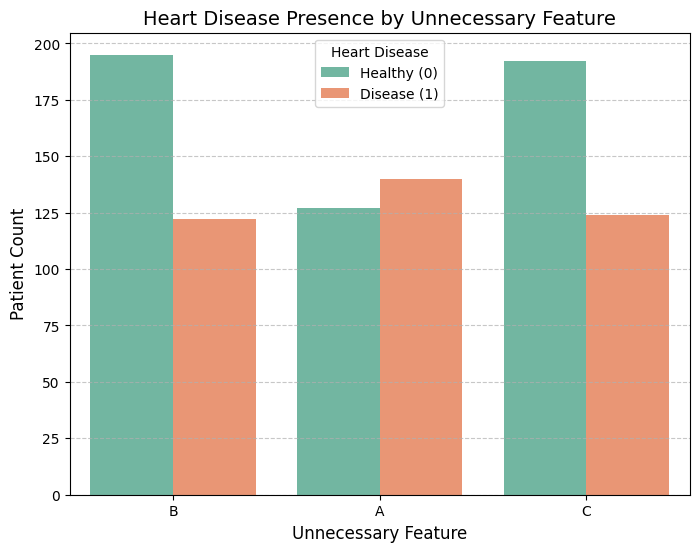

In [179]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='unnecessary_feature', hue='target', palette='Set2')
plt.title('Heart Disease Presence by Unnecessary Feature', fontsize=14)
plt.xlabel('Unnecessary Feature', fontsize=12)
plt.ylabel('Patient Count', fontsize=12)
plt.legend(title='Heart Disease', labels=['Healthy (0)', 'Disease (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()